In [1]:
import pandas as pd 
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing  import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [4]:
df.describe(include="all")

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df.drop_duplicates(keep="first",inplace=True)

In [7]:
df = df[df['Precip Type'].notna()]
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [8]:
df.sort_values(by=["Formatted Date"],inplace=True)
df.reset_index(inplace=True,drop=True)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140,9.9820,0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139,9.9015,0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140,9.9015,0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140,9.9015,0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134,9.9015,0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
95907,2016-12-31 19:00:00.000 +0100,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167,8.0178,0,1020.03,Mostly cloudy throughout the day.
95908,2016-12-31 20:00:00.000 +0100,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169,7.2450,0,1020.27,Mostly cloudy throughout the day.
95909,2016-12-31 21:00:00.000 +0100,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175,9.5795,0,1020.50,Mostly cloudy throughout the day.
95910,2016-12-31 22:00:00.000 +0100,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182,8.4042,0,1020.65,Mostly cloudy throughout the day.


In [9]:
df=df.drop(columns=["Formatted Date","Loud Cover"],axis=1)
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140,9.9820,1016.66,Mostly cloudy throughout the day.
1,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139,9.9015,1016.15,Mostly cloudy throughout the day.
2,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140,9.9015,1015.87,Mostly cloudy throughout the day.
3,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140,9.9015,1015.56,Mostly cloudy throughout the day.
4,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134,9.9015,1014.98,Mostly cloudy throughout the day.


In [10]:
df["Precip Type"].nunique()

2

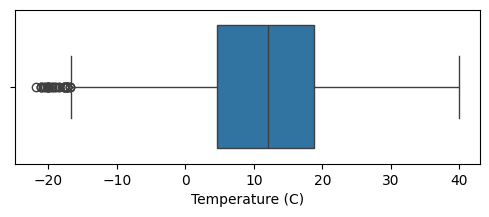

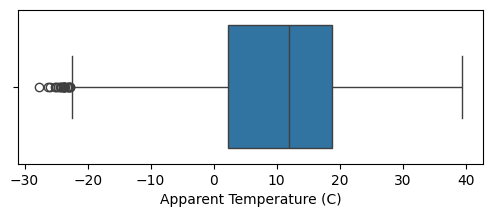

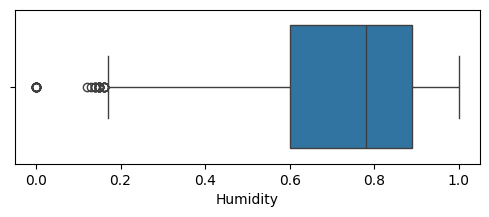

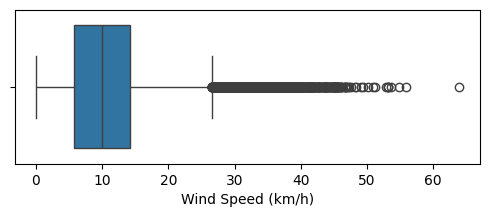

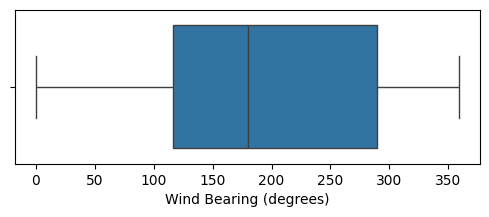

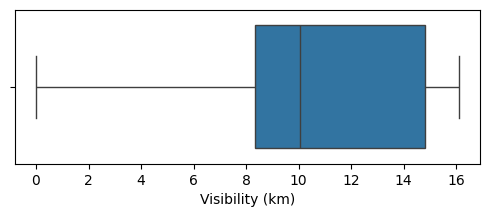

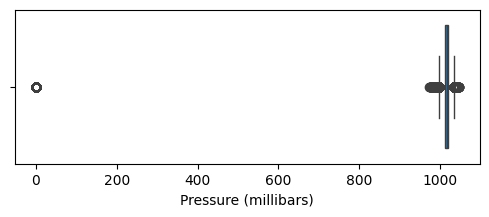

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(6,2))
        sns.boxplot(data=df,x=column)


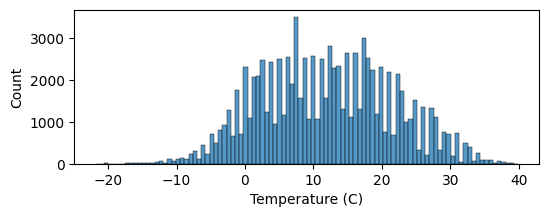

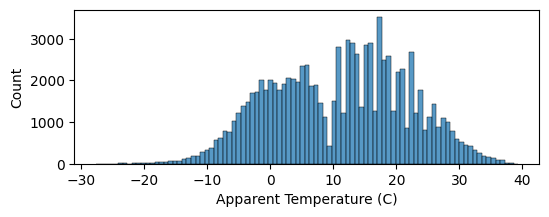

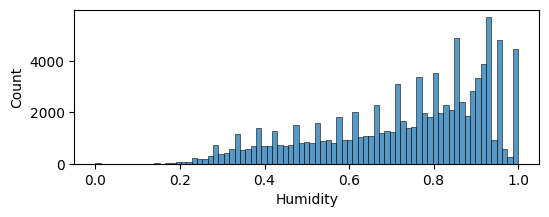

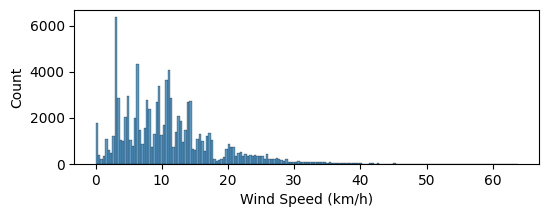

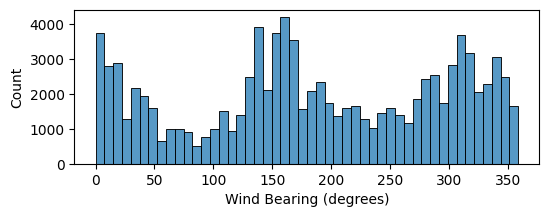

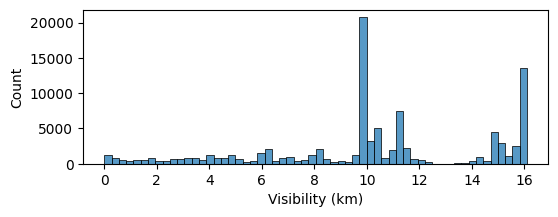

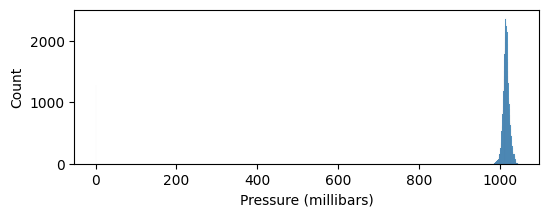

In [12]:
for column in df1:
        plt.figure(figsize=(6,2))
        sns.histplot(data=df,x=column)

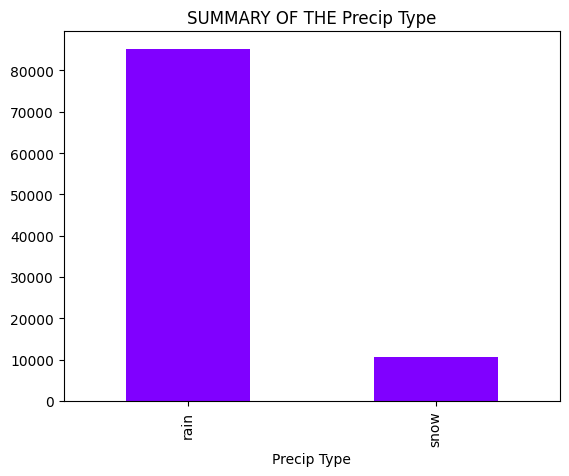

In [13]:
df['Precip Type'].value_counts().plot(kind='bar', cmap='rainbow')
plt.title('SUMMARY OF THE Precip Type')
plt.show()

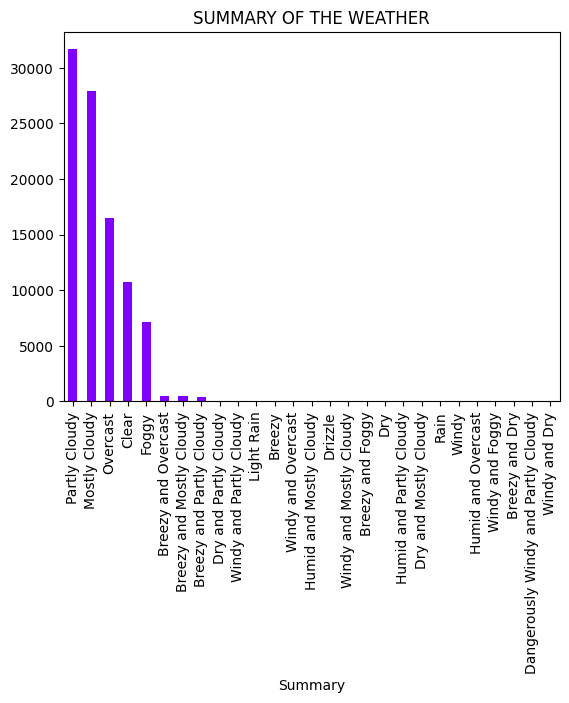

In [14]:
df['Summary'].value_counts().plot(kind='bar', cmap='rainbow')
plt.title('SUMMARY OF THE WEATHER')
plt.show()

In [15]:
df = df[df['Humidity'] != 0.0]
df = df[df['Pressure (millibars)'] != 0]
df.reset_index(inplace=True, drop=True)
df.shape

(94602, 10)

In [16]:
x = df.select_dtypes(include=[np.number])
num_attribs =list(x)
cat_attribs = list(df.select_dtypes(include=np.object_))

In [17]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OrdinalEncoder(), cat_attribs)])
x=full_pipeline.fit_transform(df)
x

array([[ -1.19099965,  -1.39641442,   0.79227398, ...,  19.        ,
          0.        , 111.        ],
       [ -1.12996515,  -1.32059788,   0.58771043, ...,  17.        ,
          0.        , 111.        ],
       [ -1.07706858,  -1.31280851,   0.43428777, ...,  17.        ,
          0.        , 111.        ],
       ...,
       [ -1.27586667,  -1.33358016,   0.79227398, ...,  17.        ,
          1.        , 111.        ],
       [ -1.30086175,  -1.35850615,   0.89455575, ...,  17.        ,
          1.        , 111.        ],
       [ -1.32236915,  -1.38135497,   0.94569664, ...,  17.        ,
          1.        , 111.        ]])

In [18]:
y=x[:,7]
y

array([19., 17., 17., ..., 17., 17., 17.])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier 
model=KNeighborsClassifier(weights="distance")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score 
print("KNN CLASSIFIER:-",accuracy_score(y_test,y_pred))

KNN CLASSIFIER:- 0.98186123208321


In [21]:
from sklearn.model_selection import cross_val_score
def display_scores(Scores):
    print("Scores:",Scores)
    print("Mean:", Scores.mean())
    print("Standard deviation:", Scores.std())
scores=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.1687209  0.17407766 0.17285889 0.17367235 0.1583922  0.21104125
 0.18995196 0.17163148 0.1732661  0.18353663]
Mean: 0.17771494205484376
Standard deviation: 0.013632661207618814


In [22]:
from sklearn.tree import DecisionTreeClassifier 
model_tree=DecisionTreeClassifier(criterion="gini",random_state=42)
model_tree.fit(x_train,y_train)
y_pred_tree=model_tree.predict(x_test)
from sklearn.metrics import accuracy_score
print("Decision_tree_classifier:-", accuracy_score(y_test,y_pred_tree))

Decision_tree_classifier:- 0.9998731554691134


In [23]:
scores=cross_val_score(model_tree,x_train,y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.01187116 0.         0.         0.         0.         0.011872
 0.011872   0.011872   0.011872   0.011872  ]
Mean: 0.00712311490371188
Standard deviation: 0.005815998969449745


In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=0)
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
from sklearn.metrics import accuracy_score
print("random forest classifier:-",accuracy_score(y_test,y_pred_rf))

random forest classifier:- 0.9993657773455668


In [25]:
scores=cross_val_score(model_rf,x_train,y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.05174519 0.04598005 0.0489495  0.0741406  0.0205629  0.1482812
 0.04748799 0.07318391 0.05174884 0.06819943]
Mean: 0.06302796175347243
Standard deviation: 0.032108595525503124


In [26]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)
y_pred_2=model_nb.predict(x_test)
from sklearn.metrics import accuracy_score
print("GAUSSIAN_CLASS:-",accuracy_score(y_test,y_pred_2))

GAUSSIAN_CLASS:- 0.9999577184897045


In [27]:
scores=cross_val_score(model_nb,x_train,y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.01187116 0.011872   0.         0.         0.         0.
 0.         0.011872   0.011872   0.011872  ]
Mean: 0.005935915143811136
Standard deviation: 0.005935915148527021


In [28]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_pred_lr,y_test)
print("mse:-","{:.4}".format(mse))
import numpy as np 
r_mse=np.sqrt(mse)
print("r_mse:-","{:.4}".format(r_mse))

mse:- 1.051e-27
r_mse:- 3.242e-14


In [29]:
scores=cross_val_score(model_lr,x_train,y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [3.05554793e-14 2.82234877e-14 2.70133541e-14 3.44662564e-14
 3.14135228e-14 2.83462590e-14 3.30883197e-14 2.84670480e-14
 3.10815478e-14 3.34114982e-14]
Mean: 3.0606677302767826e-14
Standard deviation: 2.409981586386287e-15


In [30]:
from sklearn.svm import SVC
svc_model=SVC(kernel="linear")
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
from sklearn.metrics import accuracy_score
print("SVC linear=",accuracy_score(y_test,y_pred))

SVC linear= 0.9999154369794089
